**Aritificial Neural Network Implementation**
**On Sensor_fault_detection_dataset**


In [64]:
### Checking the Version on tensorflow

In [2]:
import tensorflow
print(tensorflow.__version__)

2.9.2


*Importing the Libraries*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv("/content/aps_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [7]:
dataset.shape

(5000, 171)

In [8]:
dataset.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [9]:
dataset=dataset.replace("na",np.nan)

In [10]:
dataset.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [12]:
pd.options.display.max_rows = 1000

In [13]:
dataset.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
ae_000     224
af_000     224
ag_000      58
ag_001      58
ag_002      58
ag_003      58
ag_004      58
ag_005      58
ag_006      58
ag_007      58
ag_008      58
ag_009      58
ah_000      60
ai_000      56
aj_000      56
ak_000     384
al_000      65
am_0        56
an_000      65
ao_000      53
ap_000      65
aq_000      53
ar_000     242
as_000      56
at_000      56
au_000      56
av_000     224
ax_000     224
ay_000      58
ay_001      58
ay_002      58
ay_003      58
ay_004      58
ay_005      58
ay_006      58
ay_007      58
ay_008      58
ay_009      58
az_000      58
az_001      58
az_002      58
az_003      58
az_004      58
az_005      58
az_006      58
az_007      58
az_008      58
az_009      58
ba_000      61
ba_001      61
ba_002      61
ba_003      61
ba_004      61
ba_005      61
ba_006      61
ba_007      61
ba_008      61
ba_009      61
bb_000      60
bc_000     243
bd_000     243
be_000    

In [11]:
dataset.isnull().sum().sum()

71649

***Replacing the nan value with null value***

In [17]:
pd.DataFrame(dataset.isnull().sum().sort_values(ascending = False)).rename(columns={0:"Null Value Count"})



,Null Value Count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
bo_000,3832
bn_000,3631
bm_000,3273
bl_000,2234
bk_000,1880


In [18]:
[feature for feature in dataset.columns if feature not in ['class']]

['aa_000',
 'ab_000',
 'ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 'ce_000',
 

In [19]:
### Filling null Values in feature with median of that feature
for feature in [feature for feature in dataset.columns if feature not in ['class']]:
  dataset[feature]=dataset[feature].fillna(dataset[feature].median())

In [20]:
dataset.isnull().sum().sum()

0

In [21]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [22]:
X=dataset.drop("class",axis=1)
y=dataset["class"]

In [23]:
X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,6,0,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,90,0,0,66,0,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,30,0.0,16,14,0,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,444,0.0,14,12,0,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,82,0.0,12,10,0,0,0,0,1464,4980,...,1010,132,310,56,92,1292,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,31394,0.0,0,136.0,0,0,0,0,0,0,...,393008,207182,367634,267778,106778,48688,57146,638,0,0
4996,1598,0.0,0,136.0,0,0,0,0,0,0,...,5298,3164,9710,47042,2296,1098,3288,272,0,0
4997,42,2,2130706454,56,0,0,0,0,0,0,...,660,272,334,76,14,0,0,0,0,0
4998,32752,0.0,0,136.0,0,0,0,0,0,0,...,533772,37122,56252,23188,1138,134,22,0,0,0


In [24]:
y

0       neg
1       neg
2       neg
3       neg
4       neg
       ... 
4995    neg
4996    neg
4997    neg
4998    neg
4999    neg
Name: class, Length: 5000, dtype: object

In [25]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [27]:
y=pd.get_dummies(y,drop_first=True)

In [28]:
y

,pos
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


***Spliting the Dataset***

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state=0)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
     


In [34]:
## Importing the Keras Libraries and packages

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [35]:
classifier=Sequential()

classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim =170))

classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
 
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [36]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [37]:
classifier.summary("")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_history=classifier.fit(X_train,y_train,batch_size=10,epochs=30,validation_split=0.25)

Epoch 1/30
300/300 [==============================] - 5s 4ms/step - loss: 0.4401 - accuracy: 0.8603 - val_loss: 0.1264 - val_accuracy: 0.9820
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9807 - val_loss: 0.0679 - val_accuracy: 0.9850
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0453 - accuracy: 0.9870 - val_loss: 0.0522 - val_accuracy: 0.9860
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9910 - val_loss: 0.0458 - val_accuracy: 0.9860
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0424 - val_accuracy: 0.9880
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0424 - val_accuracy: 0.9880
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 

In [41]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
model_history.history['accuracy']

[0.8603333234786987,
 0.9806666374206543,
 0.9869999885559082,
 0.9909999966621399,
 0.9919999837875366,
 0.9943333268165588,
 0.9950000047683716,
 0.9950000047683716,
 0.9959999918937683,
 0.9980000257492065,
 0.9973333477973938,
 0.9980000257492065,
 0.9973333477973938,
 0.9973333477973938,
 0.9980000257492065,
 0.9983333349227905,
 0.9986666440963745,
 0.9956666827201843,
 0.9990000128746033,
 0.9990000128746033,
 0.9990000128746033,
 0.9993333220481873,
 0.9990000128746033,
 0.9993333220481873,
 0.9990000128746033,
 0.999666690826416,
 0.9993333220481873,
 0.999666690826416,
 0.999666690826416,
 0.999666690826416]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


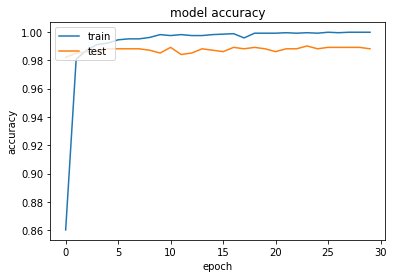

In [44]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     

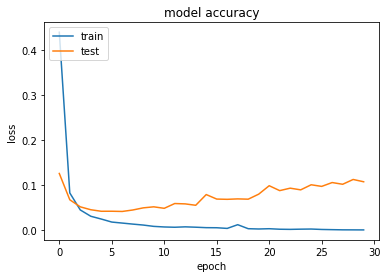

In [45]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
X_test.shape

(1000, 170)

In [47]:
y_pred=classifier.predict(X_test)
     

32/32 [==============================] - 0s 1ms/step


In [48]:
#for the sigmoid my threshold is 0.
y_pred=y_pred>0.5

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
y_test.shape

(1000, 1)

In [51]:
y_pred.shape

(1000, 1)

In [52]:
confusion_matrix(y_test,y_pred)

array([[982,   4],
       [  6,   8]])

In [53]:
import time
import os

In [54]:
def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [55]:
classifier.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2023_01_22_07_57_35_.h5


In [56]:
#hyperparameter tunig with keras tuner

!pip install keras-tuner --upgrade
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.2 MB/s eta 0:00:00


In [57]:
from kerastuner.tuners import RandomSearch

<ipython-input-57-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [58]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=170))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [59]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='aps-fault')
     


In [60]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Trial 4 Complete [00h 00m 03s]
val_accuracy: 0.3479999899864197

Best val_accuracy So Far: 0.9929999709129333
Total elapsed time: 00h 00m 11s


In [61]:
tuner.get_best_hyperparameters()[0].values
     

{'optimizer': 'adam'}

In [62]:
mymodel=tuner.get_best_models(num_models=1)[0]
     

In [63]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________
